# A.1 HMM Signal Source

In this first project assignment you will discover how an HMM can generate a sequence with a kind of structured randomness that is typical of many real-life signals. You will do this by coding an HMM signal source in Python. You will also have to verify that your implementation is correct. You must submit your work before the deadline, as instructed on the course project web page.

This assignment will be based on a few classes that have been provided to you in the PattRecClasses directory. The PattRecClasses package contains definitions of a few classes that are intended to work together. Each class is defined in a separate Python file:

    DiscreteD   %Implements discrete distribution
    GaussD      %Implements a Gaussian scalar or vector distribution
    HMM         %A general HMM class
    MarkovChain %Implements the state-generator part of an HMM

In [1]:
from PattRecClasses import DiscreteD, GaussD, HMM, MarkovChain
from matplotlib import pyplot as plt

import numpy as np

An HMM object consists of one object called StateGen of class MarkovChain and one OutputDistr object array of class DiscreteD, GaussD, or GaussMixD, to represent the state-conditional HMM output distributions. 

> The purpose of this class structure is to allow extensions to any type of output probability distribution without changing the other classes. 

You can easily define additional distribution types yourself, if needed. Regardless of its type, the array of output distributions must include exactly one element for each of the possible MarkovChain states. It is very easy to define a simple HMM using the various class constructor methods:

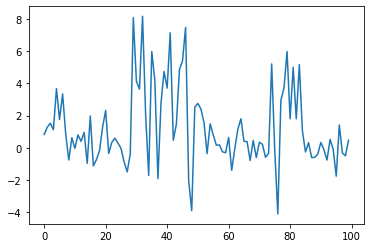

In [2]:
# Example: Define and use a simple infinite-duration HMM

# State generator
mc = MarkovChain( np.array( [ 0.5, 0.5 ] ), np.array( [ [ 0.9, 0.1 ], [ 0.05, 0.95 ] ] ) ) 

g1 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g2 = GaussD( means=[2], stdevs=[3] )   # Distribution for state = 2
h  = HMM( mc, [g1, g2])                # The HMM

# Generate an output sequence
x,s = h.rand( 100 )

plt.plot( x[0] )
plt.show()


Exampe of plot for the above code. (You can uncomment and test the above code when you have completed A.1.1.)

<img src="images/hmm_example.png" alt="test example" style="width: 300px;">

You will find that many of the class methods have already been implemented for you, although the code can probably be improved.

## A.1.1 HMM Random Source

Your task is to code and verify Python methods to generate an output sequence of random real numbers $x = (x_1 ...x_t ...x_T)$ from an HMM with scalar Gaussian output distributions. However, your code should be general enough to handle a vector random variables as well.

An HMM output sequence is always the result of two separate random operations: First, the hidden Markov chain must generate an integer state sequence $s = (s_1 . . . s_T )$.

Then, for each element st in the state sequence, the corresponding state-conditional output distribution generates the random observable output X_t. In the PattRecClasses code package three different functions are involved in the process: @HMM/rand, @MarkovChain/rand, and for example @GaussD/rand, if the output distribution is an instance of the GaussD class.

### Tasks

1. Open @DiscreteD and finish the code of the <i>rand function</i> to perform as specified by the functions comments. Save the file, restart the kernel and reimport the class DiscreteD. 

2. Open @MarkovChain and finish the code of the <i>rand function</i> to perform as specified by the functions comments. Save the file, restart the kernel and reimport the class MarkovChain. 
Since the initial state of a Markov chain, and its transitions conditioned on the current state, can be seen as discrete random variables, you can use the DiscreteD class and the rand method you implemented in the previous step to simplify your work here. Note that your function must be able to generate output sequences for either an infinite-duration or a finite-duration Markov chain. Of course, your function should only produce sequences of finite length, even if the HMM itself could in principle continue forever.

3. Open @HMM and finish the code of the <i>rand function</i> to perform as specified by the functions comments. Save the file, restart the kernel and reimport the class HMM. 


## A.1.2 Verify the MarkovChain and HMM Sources

To verify your code, use the following infinite-duration HMM $\lambda = {q, A, B}$ as a first test example:

<img src="images/a_1_2_1.png" alt="test example" style="width: 500px;">

where $b_1(x)$ is a scalar Gaussian density function with mean $\mu_1 = 0$ and standard deviation $\sigma_1 = 1$, and $b_2(x)$ is a similar distribution with mean $\mu_2 = 3$ and standard deviation $\sigma_2 = 2$.

1. To verify your Markov chain code, calculate $P (S_t = j),\,j ∈ {1, 2}$ for $t = 1,2,3,\dots$ theoretically, by hand, to verify that $P(S_t = j)$ is actually constant for all $t$.
2. Use your Markov chain rand function to generate a sequence of $T = 10000$ state integer numbers from the test Markov chain. Calculate the relative frequency of occurrences of $S_t = 1$ and $S_t = 2$. The relative frequencies should of course be approximately equal to $P(S_t)$.
3. To verify your HMM rand method, first calculate $E[X_t]$ and $var[X_t]$ theoretically. The conditional expectation formulas $\mu_X = E[X] = E_Z [E_X [X|Z]]$ and $var [X] = E_Z [var_X [X|Z]] + var_Z [E_X [X|Z]]$ apply generally whenever some variable $X$ depends on another variable $Z$ and may be useful for the calculations. Then use your HMM rand function to generate a sequence of $T = 10000$ output scalar random numbers $x = (x_1 \dots x_t \dots x_T)$ from the given HMM test example. Use the standard Numpy functions $np.mean()$ and $np.var()$ to calculate the mean and variance of your generated sequence. The result should agree approximately with your theoretical values.
4. To get an impression of how the HMM behaves, use @HMM/rand to generate a series of $500$ contiguous samples $X_t$ from the HMM, and plot them as a function of $t$. Do this many times until you have a good idea of what characterizes typical output of this HMM, and what structure there is to the randomness. Describe the behaviour in one or two sentences in your report. Also include one such plot in the report, labelled using title, xlabel, and ylabel to clearly show which variable is plotted along which axis. You should do this for every plot in the course project.
5. Create a new HMM, identical to the previous one except that it has $\mu_2 = \mu_1 = 0$. Generate and plot $500$ contiguous values several times using @HMM/rand for this HMM. What is similar about how the two HMMs behave? What is different with this new HMM? Is it possible to estimate the state sequence $S$ of the underlying Markov chain from the observed output variables $x$ in this case?
6. Another aspect you must check is that your rand-function works for _finite-duration_ HMMs. Define a new test HMM of your own and verify that your function returns reasonable results.
7. Finally, your rand function should work also when the state-conditional output distributions generate random vectors. Define a new test HMM of your own where the outputs are Gaussian vector distributions, and verify that this also works with your code. (Note that a single instance of the GaussD class is capable of generating vector output; stacking several GaussD-objects is not correct.) At least one of the output distributions should have a non-diagonal covariance matrix such as

<img src="images/a_1_2_2.png" alt="test example" style="width: 160px;">

#### You should write the code used to answer questions 2, 3, 4, 5, 6, 7 below in the dedicated blocs.

### Question 2: 

In [26]:
mc = MarkovChain( np.array( [ 0.75, 0.25 ] ), np.array( [ [ 0.99, 0.01 ], [ 0.03, 0.97 ] ] ) ) 
stateSamples = list(mc.rand(10000))
freqState1 = stateSamples.count(1)/len(stateSamples)
freqState2 = stateSamples.count(2)/len(stateSamples)

print('Frequency of State 1 = %.5f' %freqState1)
print('Frequency of State 2 = %.5f' %freqState2)

Frequency of State 1 = 0.75210
Frequency of State 2 = 0.24790


### Question 3:

In [30]:
mc = MarkovChain( np.array( [ 0.75, 0.25 ] ), np.array( [ [ 0.99, 0.01 ], [ 0.03, 0.97 ] ] ) ) 
g1 = GaussD( means=[0], stdevs=[1] )
g2 = GaussD( means=[3], stdevs=[2] )
h  = HMM( mc, [g1, g2])
x,s = h.rand(10000)
mean = x.mean()
variance = x.var()

print('Estimated MEAN = %.5f' %mean)
print('Estimated VARIANCE = %.5f' %variance)

Estimated MEAN = 0.74831
Estimated VARIANCE = 3.45386


### Question 4: 

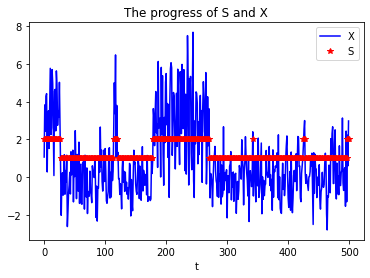

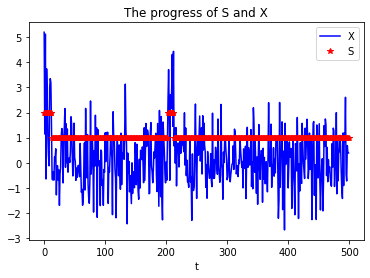

In [9]:
mc = MarkovChain( np.array( [ 0.75, 0.25 ] ), np.array( [ [ 0.99, 0.01 ], [ 0.03, 0.97 ] ] ) ) 
g1 = GaussD( means=[0], stdevs=[1] )
g2 = GaussD( means=[3], stdevs=[2] )
h  = HMM( mc, [g1, g2])

# Samples 1
x1,s1 = h.rand(500)
plt.plot(x1[0], 'b')
plt.plot(s1, 'r*')
plt.legend(['X', 'S'])
plt.title('The progress of S and X')
plt.xlabel('t')
plt.show()

# Samples 2
x2,s2 = h.rand(500)
plt.plot(x2[0], 'b')
plt.plot(s2, 'r*')
plt.legend(['X', 'S'])
plt.title('The progress of S and X')
plt.xlabel('t')
plt.show()

### Question 5: 

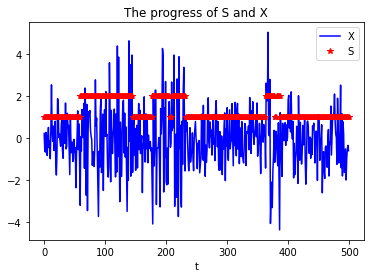

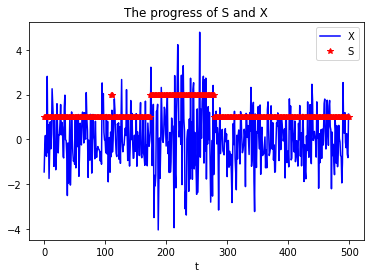

In [10]:
mc = MarkovChain( np.array( [ 0.75, 0.25 ] ), np.array( [ [ 0.99, 0.01 ], [ 0.03, 0.97 ] ] ) ) 
g1 = GaussD( means=[0], stdevs=[1] )
g2 = GaussD( means=[0], stdevs=[2] )
h  = HMM( mc, [g1, g2])

# Samples 1
x1,s1 = h.rand(500)
plt.plot(x1[0], 'b')
plt.plot(s1, 'r*')
plt.legend(['X', 'S'])
plt.title('The progress of S and X')
plt.xlabel('t')
plt.show()

# Samples 2
x2,s2 = h.rand(500)
plt.plot(x2[0], 'b')
plt.plot(s2, 'r*')
plt.legend(['X', 'S'])
plt.title('The progress of S and X')
plt.xlabel('t')
plt.show()

### Question 6: 

In [11]:
mc = MarkovChain( np.array( [ 0.75, 0.25 ] ), np.array( [ [ 0.5, 0.49, 0.01  ], [ 0.3, 0.69, 0.01 ] ] ) ) 
g1 = GaussD( means=[0], stdevs=[1] )
g2 = GaussD( means=[3], stdevs=[2] )
h  = HMM( mc, [g1, g2])
maxLength = 300
x,s = h.rand(maxLength)
print('This is supposed to be a finite duration HMM, \nMax number of states = %d\nThe length of S (hidden state) generated = %d\nThe length of X (output) generated = %d'%(maxLength,len(s) ,x.shape[1]))

This is supposed to be a finite duration HMM, 
Max number of states = 300
The length of S (hidden state) generated = 98
The length of X (output) generated = 98


### Question 7: 

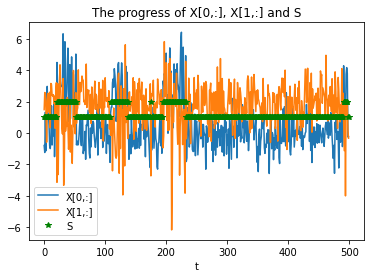

In [25]:
mc = MarkovChain( np.array( [ 0.75, 0.25 ] ), np.array( [ [ 0.99, 0.01 ], [ 0.03, 0.97 ] ] ) ) 

g1 = GaussD( means=[0, 2], cov=np.array([[1, 0],[0, 1]]) )
g2 = GaussD( means=[3, 1], cov=np.array([[2, 1],[1, 4]]) )
h  = HMM( mc, [g1, g2])

x, s = h.rand(500)
plt.plot(x[0])
plt.plot(x[1])
plt.plot(s, 'g*')
plt.title('The progress of X[0,:], X[1,:] and S')
plt.legend(['X[0,:]', 'X[1,:]', 'S'])
plt.xlabel('t')
plt.show()

### Your submission should include

* A zip file with the whole Jupyter project

* A Latex report with: 
    * Your theoretically calculated $P(S_t = j)$ for the first infinite-duration HMM, and your corresponding measured relative frequencies.
    * Your theoretically calculated $E[X_t]$ and $var[X_t]$, and your corresponding measured results.
    * A plot of $500$ contiguous values randomized from the first infinite-duration HMM, with a description of typical output behaviour. 
    * A discussion of the output behaviour of the second infinite-duration HMM, with answers to the associated questions.
    * The definition of your finite-duration test HMM, together with the lengths of some test sequences you obtained, and relevant code. Discuss briefly why you think those lengths are reasonable.
    * The definition of your vector-valued test HMM, and the code you used to verify that vector output distributions work with your implementation.
    
#### The deadline for this project is May 24rd at 23:59